First, we will import the data and necessary packages:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
df = X.join(y)

We can see some basic information regarding our variables now. Let's call the head and info of our dataset to see what it looks like. 

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


We might end up changing 'yes/no' binary variables for boolean values or 0/1 for modeling purposes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Here we can see our data types, as well as have a hint as to which variables have missing values. We are going to take care of these a bit later. First, let's check for outliers.

In [5]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


For our numerical features, we can already check there are at least some outliers. All features, except for 'age' and 'day_of_week' (predictably), might suffer from outliers, with quantities jumping abnormally from the mean to the max, as well as from the 75th percentile to the max. Let's visualize some relationships.

c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

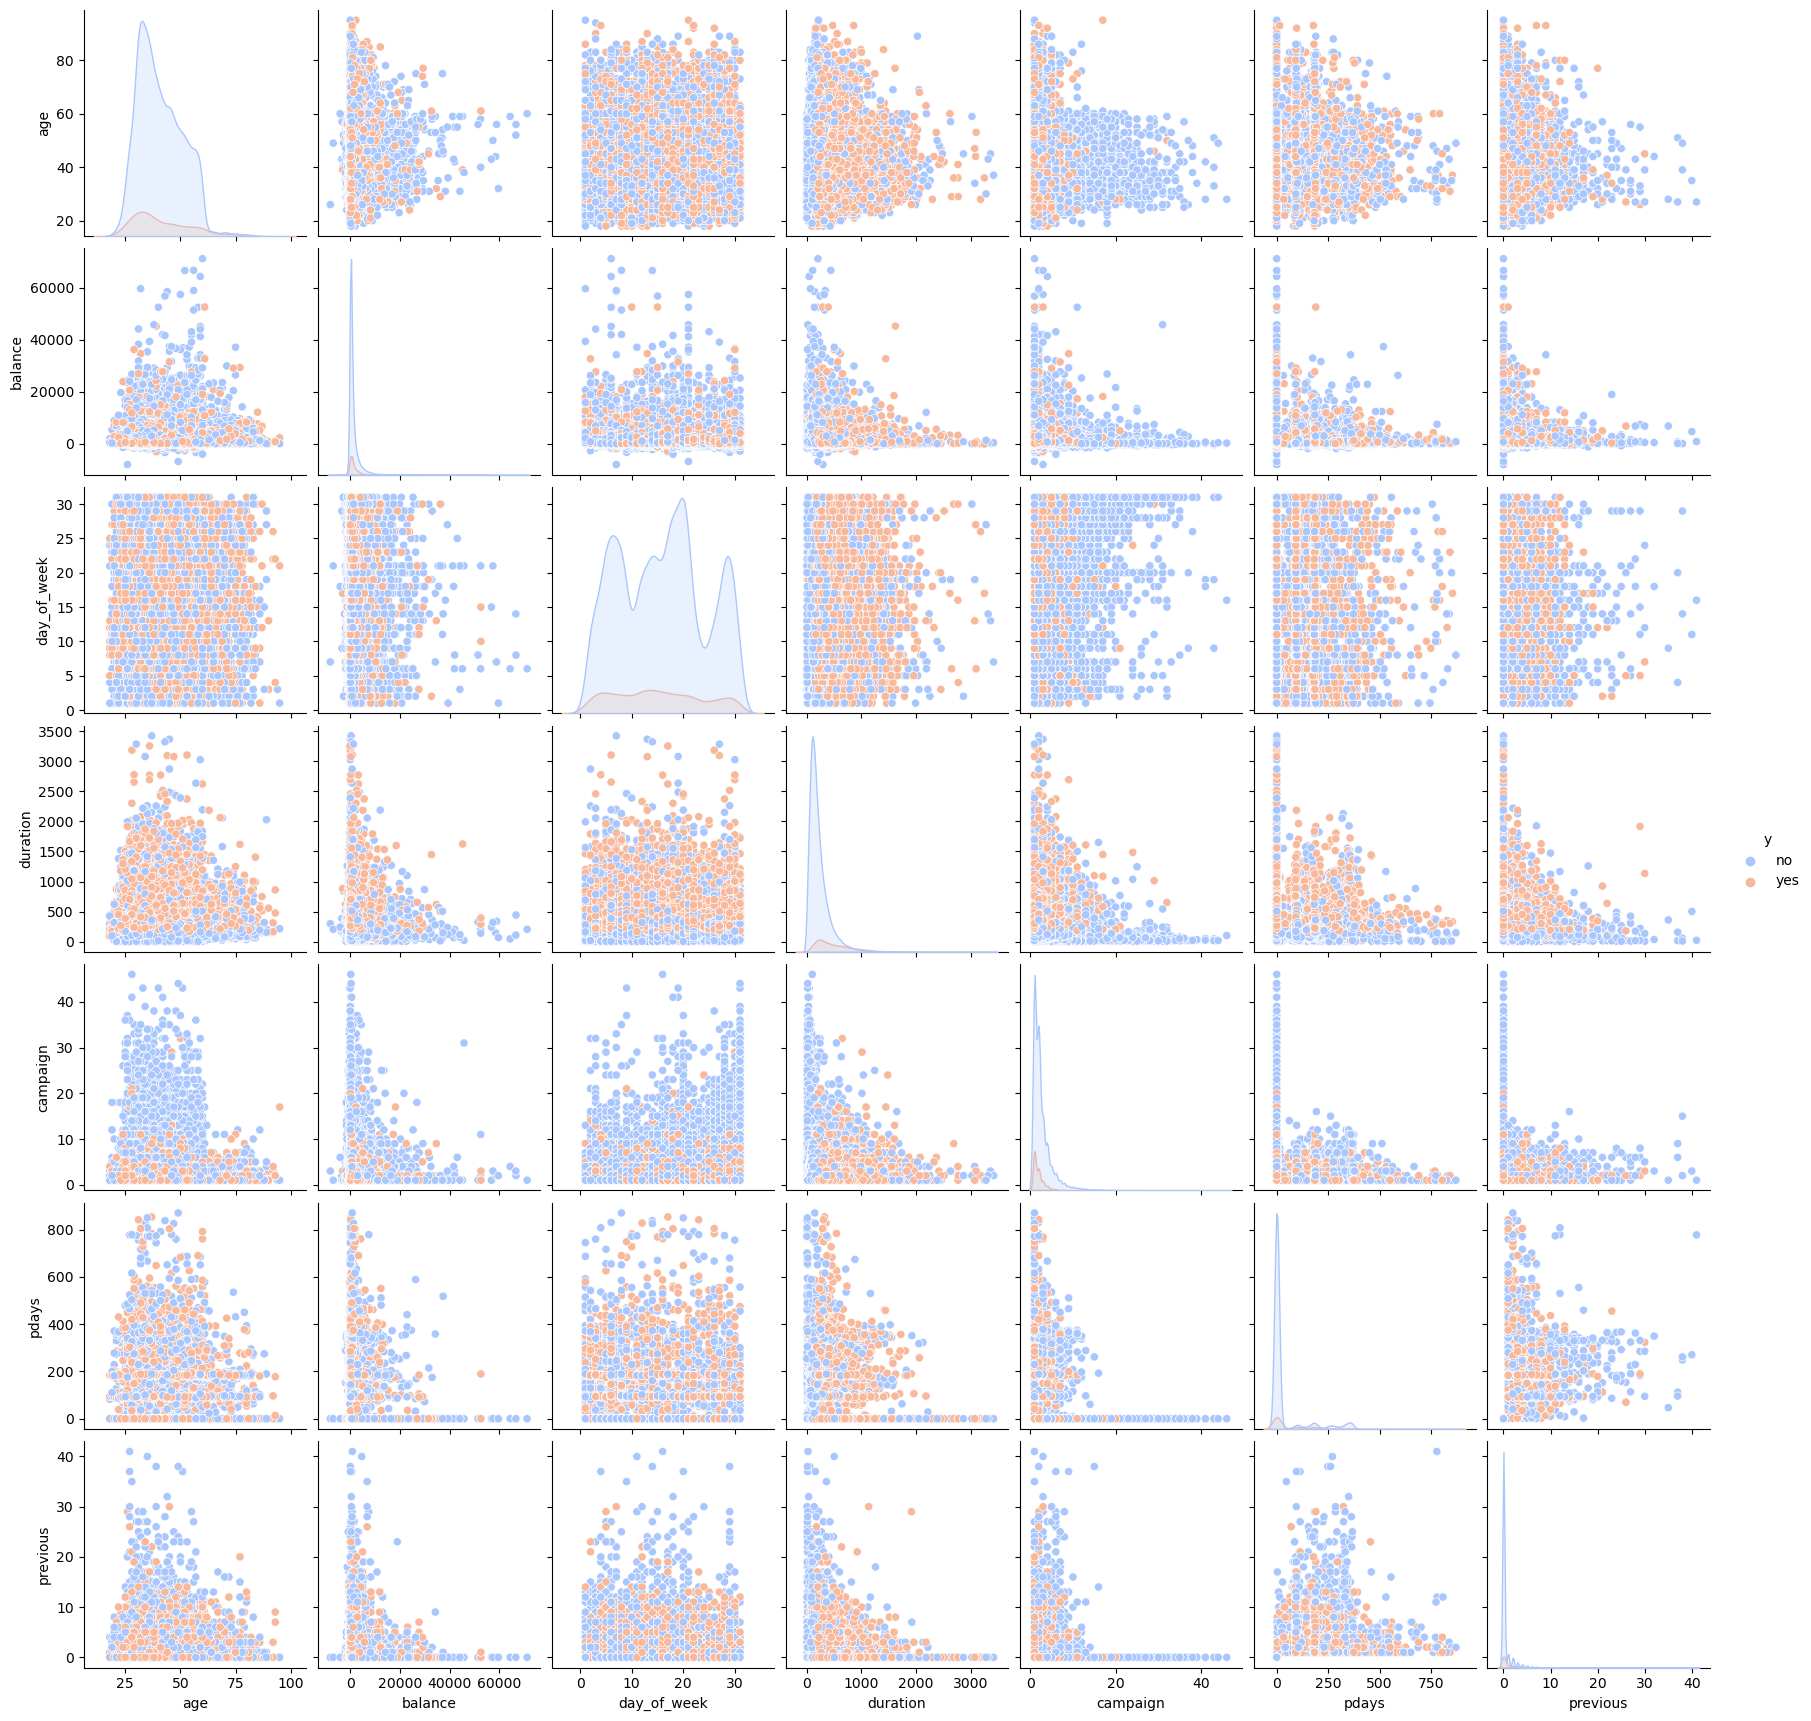

In [48]:
sns.pairplot(df, hue = 'y', palette = 'coolwarm')

There are some notable cases in these outlier-holding variables. Mainly, 'previous' seems to have only one outlier. Let's stop working with 'age' and 'days of week' and have a closer look.

In [7]:
numeric_cols = df.select_dtypes("number").columns
outlier_df = df[numeric_cols].drop(['age', 'day_of_week'], axis = 1)

c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

<Axes: xlabel='previous', ylabel='Count'>

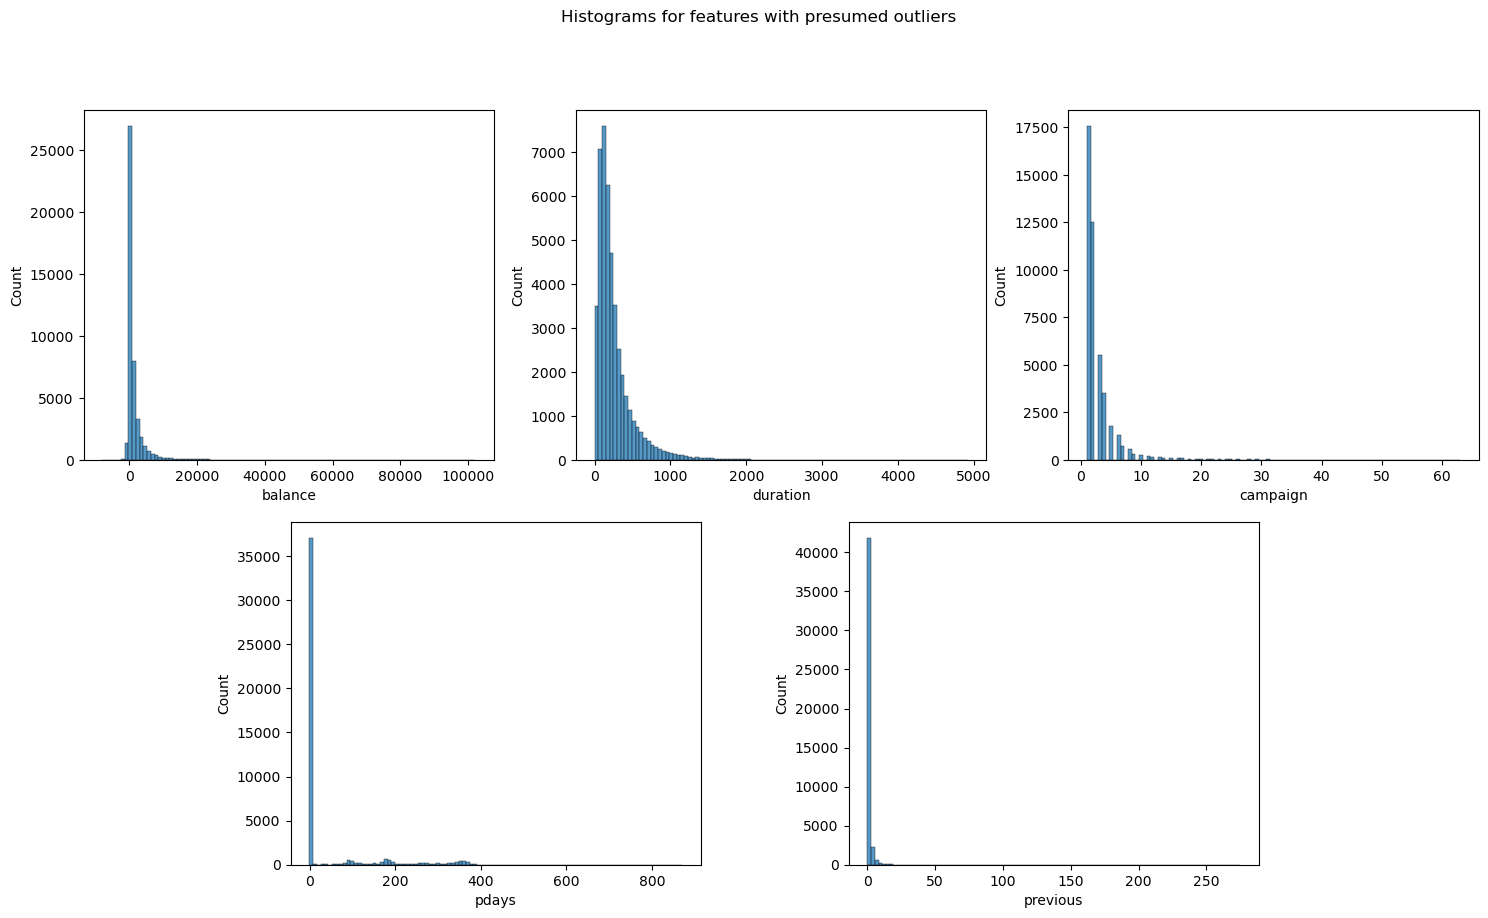

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Histograms for features with presumed outliers')

axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

sns.histplot(ax=axes[0, 0], data = outlier_df, x = 'balance', bins = 100)
sns.histplot(ax=axes[0, 1], data = outlier_df, x = 'duration', bins = 100)
sns.histplot(ax=axes[0, 2], data = outlier_df, x = 'campaign', bins = 100)
sns.histplot(ax=axes[1, 0], data = outlier_df, x = 'pdays', bins = 100)
sns.histplot(ax=axes[1, 1], data = outlier_df, x = 'previous', bins = 100)

c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: ylabel='previous'>

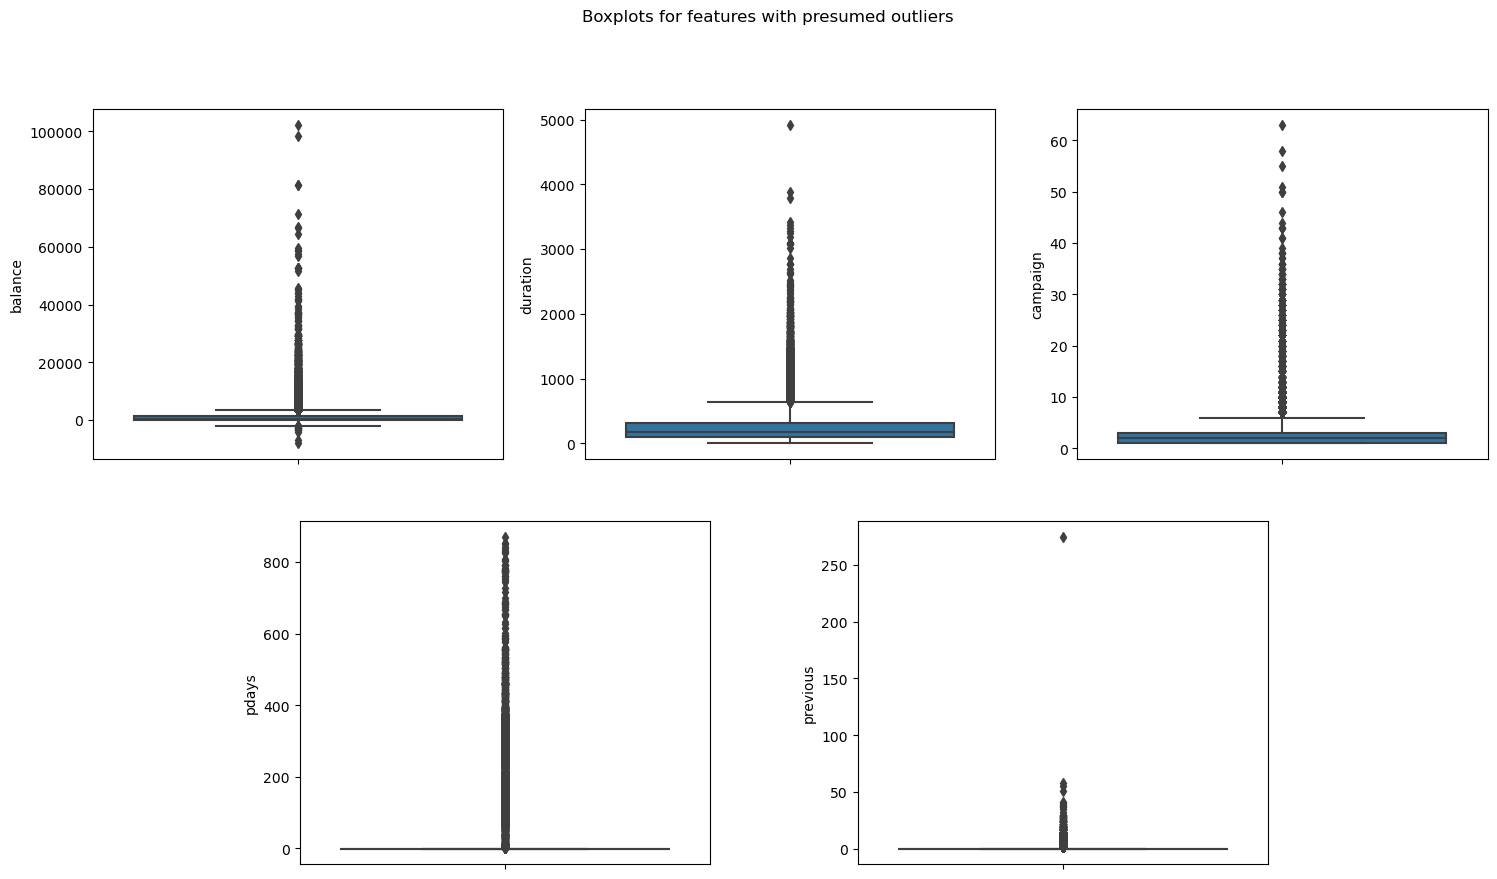

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots for features with presumed outliers')

axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

sns.boxplot(ax=axes[0, 0], data = outlier_df, y = 'balance')
sns.boxplot(ax=axes[0, 1], data = outlier_df, y = 'duration')
sns.boxplot(ax=axes[0, 2], data = outlier_df, y = 'campaign')
sns.boxplot(ax=axes[1, 0], data = outlier_df, y = 'pdays')
sns.boxplot(ax=axes[1, 1], data = outlier_df, y = 'previous')

Although the boxplot (and our initial analysis) indicate a wide range of values outside the interquartile range, it might not mean much if these variables are not normally distributed (as we have seen from the histograms and kde's). We can proceed to manually get rid of the observations with the farthest values manually, placing a 'cap' on our features.

In [25]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000
mean,40.933929,1354.267956,15.806080,257.889742,2.757136,40.167744,0.570717
std,10.615054,2925.187106,8.321926,255.484347,3.040134,100.055726,1.856456
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,71188.000000,31.000000,3422.000000,46.000000,871.000000,41.000000


<Axes: >

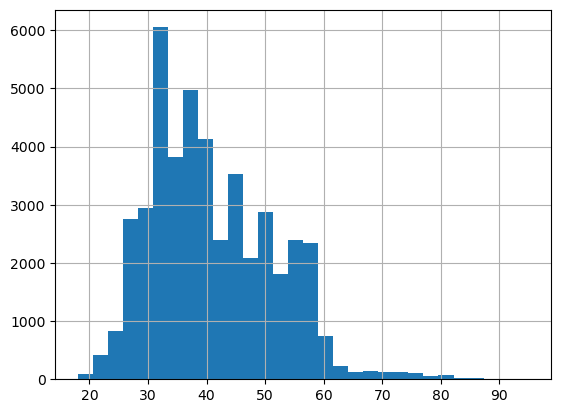

In [54]:
df['age'].hist(bins = 30)

<Axes: >

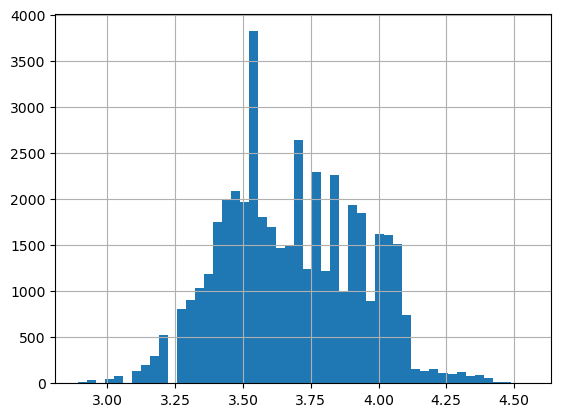

In [57]:
np.log(df['age']).hist(bins = 50)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=df[numeric_cols].columns)
norm_df.head()

c:\Users\ianpv\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ianpv\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ianpv\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ianpv\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

,age,balance,day_of_week,duration,campaign,pdays,previous
0,0.519481,0.128297,0.133333,0.076271,0.0,0.0,0.0
1,0.337662,0.101607,0.133333,0.044126,0.0,0.0,0.0
2,0.194805,0.101266,0.133333,0.022209,0.0,0.0,0.0
3,0.376623,0.120255,0.133333,0.026885,0.0,0.0,0.0
4,0.194805,0.101254,0.133333,0.057861,0.0,0.0,0.0


In [30]:
norm_df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000
mean,0.297843,0.118339,0.493536,0.075362,0.039047,0.047211,0.013920
std,0.137858,0.036931,0.277398,0.074659,0.067559,0.114743,0.045279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.102150,0.233333,0.030099,0.000000,0.000000,0.000000
50%,0.272727,0.106897,0.500000,0.052601,0.022222,0.000000,0.000000
75%,0.389610,0.119257,0.666667,0.093220,0.044444,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df = df[(df["balance"] < 80000) & (df["duration"] < 3500) & (df["campaign"] < 50) & (df["previous"] < 50)]


Now, let's check for missing values with the following code, as well as a heatmap to visualize it better.

In [11]:
df.isnull().sum()

age                0
job              288
marital            0
education       1856
default            0
balance            0
housing            0
loan               0
contact        13013
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36948
y                  0
dtype: int64

<Axes: >

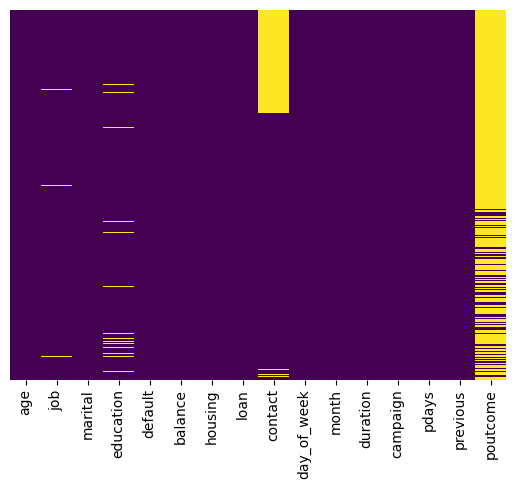

In [12]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

'poutcome' and 'contact' might have too many missing values to keep around, but we might be able to impute the ones in 'job' and 'education'.

In [19]:
df['y'].value_counts()

y
no     39910
yes     5284
Name: count, dtype: int64

In [13]:
for i in X.columns:
    if X[i].isnull().any():
        print(f'{X[i].name}:{X[i].unique()}')

job:['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
education:['tertiary' 'secondary' nan 'primary']
contact:[nan 'cellular' 'telephone']
poutcome:[nan 'failure' 'other' 'success']


'poutcome' and 'contact' might have too many missing values to keep around, but we might be able to impute the ones in 'job' and 'education'.

Text(0.5, 0, 'age')

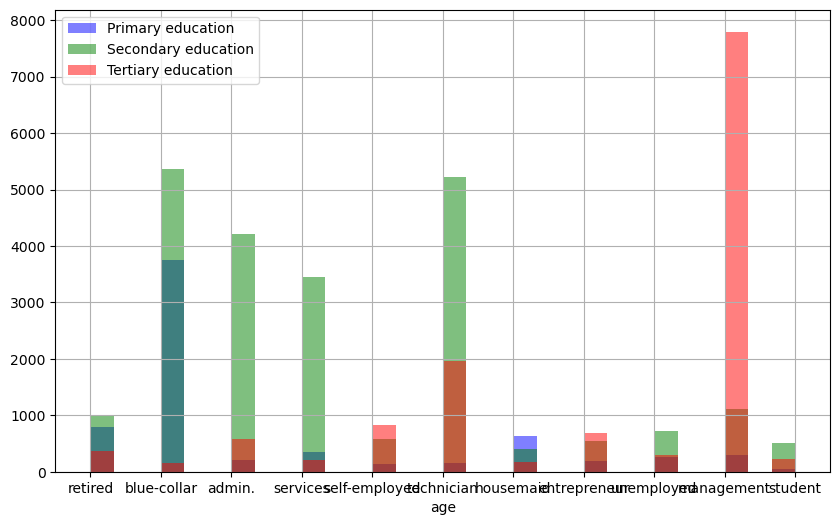

In [14]:
plt.figure(figsize=(10,6))
df[df['education']=='primary']['job'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Primary education')
df[df['education']=='secondary']['job'].hist(alpha=0.5,color='green',
                                              bins=30,label='Secondary education')
df[df['education']=='tertiary']['job'].hist(alpha=0.5,color='red',
                                              bins=30,label='Tertiary education')
plt.legend()
plt.xlabel('age')